In [6]:
from google.colab import drive
import os,sys
drive.mount('/content/drive')

my_path = '/content/notebooks'
# Colab Notebooks 안에 my_env 폴더에 패키지 저장
# 이미 심볼릭 링크가 존재하는지 확인
if os.path.islink(my_path):
    os.unlink(my_path)  # 기존 심볼릭 링크 삭제
os.symlink('/content/drive/My Drive/Colab Notebooks/my_env', my_path)
sys.path.insert(0, my_path)

#현재 폴더 경로 지정
os.chdir('/content/drive/MyDrive/Colab Notebooks/AI/Ch06')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: ignored

# 6-1

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/30
469/469 - 15s - loss: 0.2158 - accuracy: 0.9334 - val_loss: 0.0586 - val_accuracy: 0.9799 - 15s/epoch - 33ms/step
Epoch 2/30
469/469 - 2s - loss: 0.0580 - accuracy: 0.9825 - val_loss: 0.0475 - val_accuracy: 0.9835 - 2s/epoch - 4ms/step
Epoch 3/30
469/469 - 2s - loss: 0.0398 - accuracy: 0.9876 - val_loss: 0.0285 - val_accuracy: 0.9911 - 2s/epoch - 4ms/step
Epoch 4/30
469/469 - 2s - loss: 0.0310 - accuracy: 0.9901 - val_loss: 0.0315 - val_accuracy: 0.9890 - 2s/epoch - 5ms/step
Epoch 5/30
469/469 - 3s - loss: 0.0236 - accuracy: 0.9924 - val_loss: 0.0290 - val_accuracy: 0.9909 - 3s/epoch - 6ms/step
Epoch 6/30
469/469 - 2s - loss: 0.0194 - accuracy: 0.9940 - val_loss: 0.0244 - val_accuracy: 0.9919 - 2s/epoch - 4ms/step
Epoch 7/30
469/469 - 2s - loss: 0.0156 - accuracy: 0.9950 - val_loss: 0.0338 - val_accuracy: 0.9898 - 2s/epoch - 4ms/step
Epoch 8/30
469/469 - 2s - loss: 0.0137 - accuracy: 0.9954 - val_loss: 0.0317 -

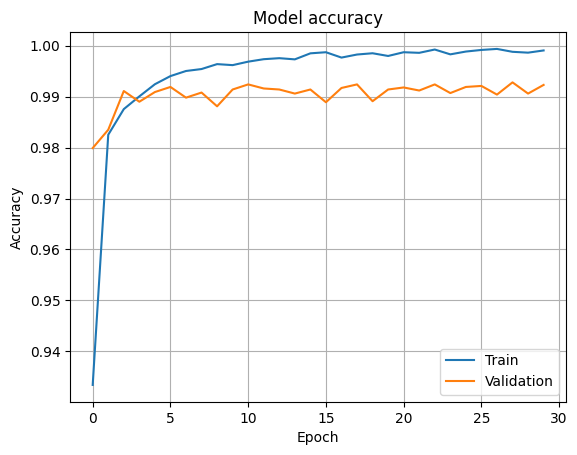

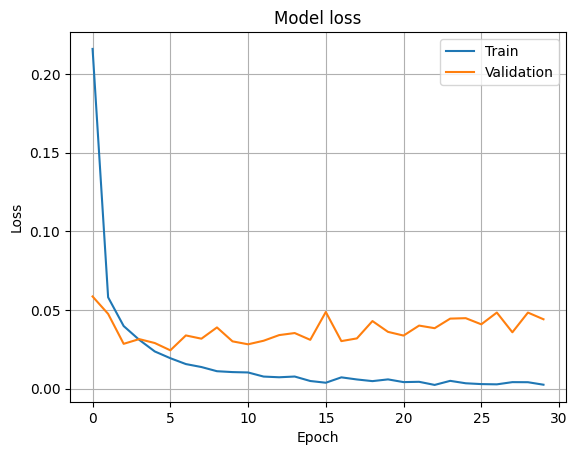

In [ ]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras.optimizers import Adam

# MNIST 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)= mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# LeNet-5 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(6,(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(16,(5,5),padding='same',activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(120,(5,5),padding='same',activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(84,activation='relu'))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

#6-2


Epoch 1/12
469/469 - 5s - loss: 0.2430 - accuracy: 0.9261 - val_loss: 0.0592 - val_accuracy: 0.9804 - 5s/epoch - 11ms/step
Epoch 2/12
469/469 - 4s - loss: 0.0881 - accuracy: 0.9741 - val_loss: 0.0374 - val_accuracy: 0.9870 - 4s/epoch - 8ms/step
Epoch 3/12
469/469 - 4s - loss: 0.0648 - accuracy: 0.9802 - val_loss: 0.0325 - val_accuracy: 0.9886 - 4s/epoch - 9ms/step
Epoch 4/12
469/469 - 4s - loss: 0.0545 - accuracy: 0.9836 - val_loss: 0.0290 - val_accuracy: 0.9889 - 4s/epoch - 8ms/step
Epoch 5/12
469/469 - 4s - loss: 0.0459 - accuracy: 0.9859 - val_loss: 0.0297 - val_accuracy: 0.9901 - 4s/epoch - 8ms/step
Epoch 6/12
469/469 - 4s - loss: 0.0391 - accuracy: 0.9879 - val_loss: 0.0265 - val_accuracy: 0.9913 - 4s/epoch - 9ms/step
Epoch 7/12
469/469 - 4s - loss: 0.0362 - accuracy: 0.9884 - val_loss: 0.0284 - val_accuracy: 0.9921 - 4s/epoch - 9ms/step
Epoch 8/12
469/469 - 4s - loss: 0.0325 - accuracy: 0.9894 - val_loss: 0.0289 - val_accuracy: 0.9915 - 4s/epoch - 8ms/step
Epoch 9/12
469/469 - 4s

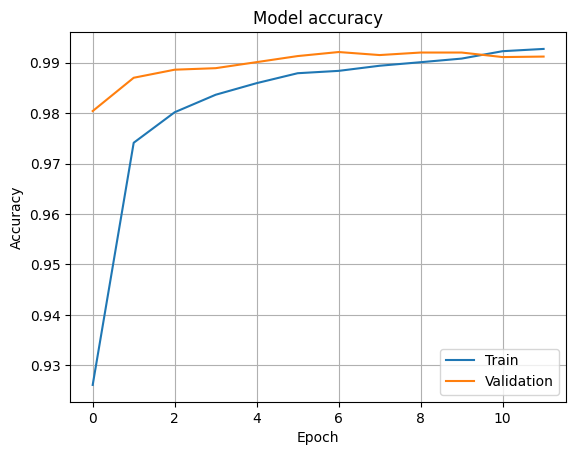

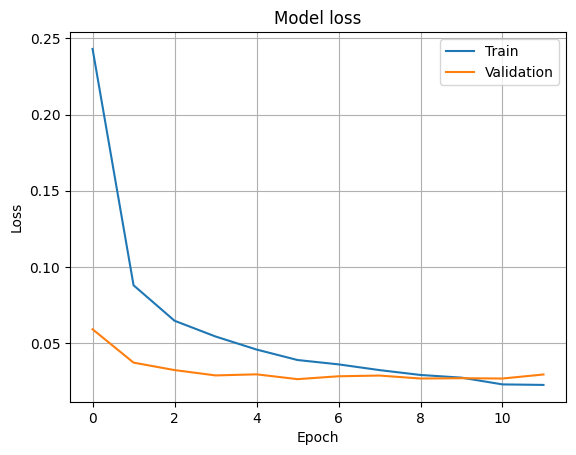

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.optimizers import Adam

# MNIST 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(128,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=12,validation_data=(x_test,y_test),verbose=2)

# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

#6-3

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/12
469/469 - 5s - loss: 0.5207 - accuracy: 0.8153 - val_loss: 0.3474 - val_accuracy: 0.8724 - 5s/epoch - 11ms/step
Epoch 2/12
469/469 - 4s - loss: 0.3456 - accuracy: 0.8767 - val_loss: 0.3042 - val_accuracy: 0.8894 - 4s/epoch - 8ms/step
Epoch 3/12
469/469 - 4s - loss: 0.3028 - accuracy: 0.8905 - val_loss: 0.2638 - val_accuracy: 0.9024 - 4s/epoch - 9ms/step
Epoch 4/12
469/469 - 4s - loss: 0.2719 - accuracy: 0.9013 - val_loss: 0.2619 - val_accuracy: 0.9042 - 4s/epoch - 9ms/step
Epoch 5/12
469/469 - 4s - loss: 0.2457 - accuracy: 0.9100 - val_loss: 0.2394 - val_accuracy: 0.9127 - 4s/epoch - 8ms/step
Epoch 6/12
469/469 - 4s - loss: 0.2271 - accuracy: 0.9160 - val_loss: 0.2311 - val_accuracy: 0.9142 - 4s/epoch - 8ms/step
Epoch 7/12
469/469 - 4s - loss: 0.2132 - accuracy: 0.9220 - val_loss: 0.2302 - val_accuracy: 0.9134 - 4s/epoch - 9ms/step
Epoch 8/12
469/469 - 4s - loss: 0.1969 - accuracy: 0.9274 - val_loss: 0.2306 - val

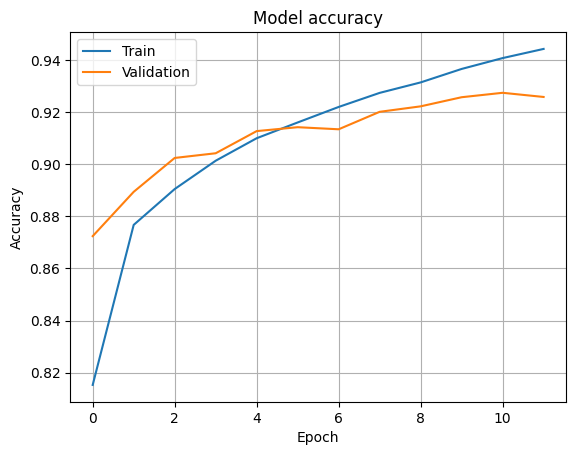

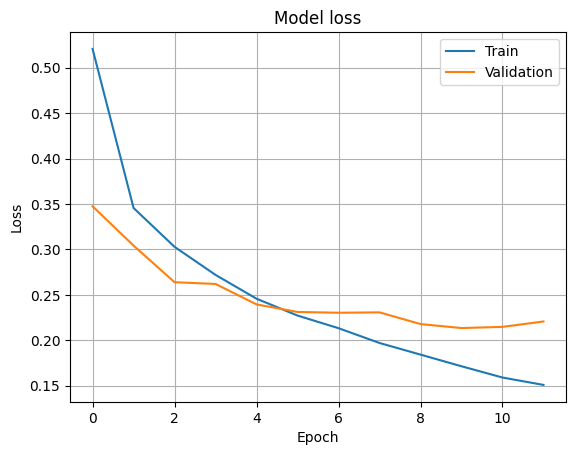

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.optimizers import Adam

# MNIST 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(128,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=12,validation_data=(x_test,y_test),verbose=2)

# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

#6-4

170498071/170498071 [==============================] - 2s 0us/step
Epoch 1/30
391/391 - 6s - loss: 1.6485 - accuracy: 0.3925 - val_loss: 1.3225 - val_accuracy: 0.5179 - 6s/epoch - 15ms/step
Epoch 2/30
391/391 - 4s - loss: 1.2476 - accuracy: 0.5527 - val_loss: 1.0847 - val_accuracy: 0.6116 - 4s/epoch - 11ms/step
Epoch 3/30
391/391 - 4s - loss: 1.0989 - accuracy: 0.6104 - val_loss: 0.9862 - val_accuracy: 0.6536 - 4s/epoch - 10ms/step
Epoch 4/30
391/391 - 4s - loss: 1.0056 - accuracy: 0.6451 - val_loss: 0.9385 - val_accuracy: 0.6740 - 4s/epoch - 10ms/step
Epoch 5/30
391/391 - 4s - loss: 0.9403 - accuracy: 0.6705 - val_loss: 0.8619 - val_accuracy: 0.6947 - 4s/epoch - 10ms/step
Epoch 6/30
391/391 - 4s - loss: 0.8797 - accuracy: 0.6904 - val_loss: 0.8281 - val_accuracy: 0.7108 - 4s/epoch - 10ms/step
Epoch 7/30
391/391 - 4s - loss: 0.8332 - accuracy: 0.7064 - val_loss: 0.7687 - val_accuracy: 0.7310 - 4s/epoch - 11ms/step
Epoch 8/30
391/391 - 4s - loss: 0.7996 - accuracy: 0.7189 - val_loss: 0.

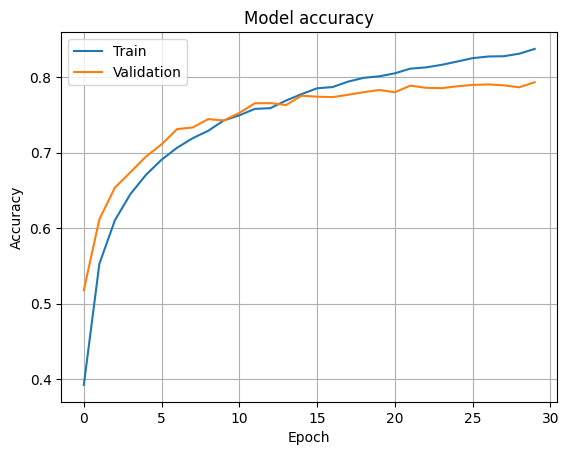

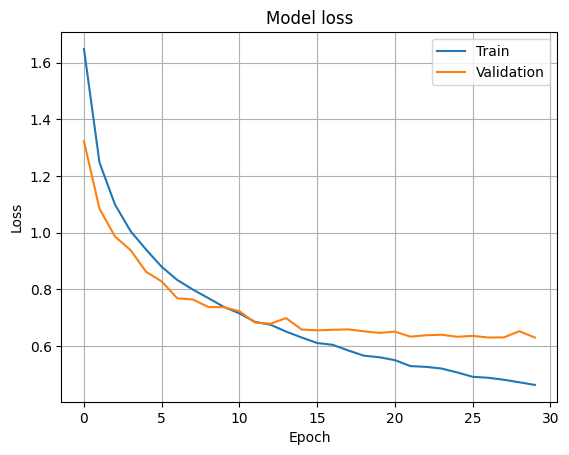

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.optimizers import Adam

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()
cnn.save("my_cnn.h5")

#6-5

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
import os
#현재 폴더 경로 지정
os.chdir('/content/drive/MyDrive/Colab Notebooks/AI/Ch06')

# 신경망 구조와 가중치를 저장하고 있는 파일을 읽어 옴
cnn=tf.keras.models.load_model("my_cnn.h5")
cnn.summary()

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 12, 12, 64)        18496     
                                                         

#6-6

Epoch 1/30
391/391 - 6s - loss: 1.6093 - accuracy: 0.4044 - val_loss: 1.2520 - val_accuracy: 0.5479 - 6s/epoch - 15ms/step
Epoch 2/30
391/391 - 4s - loss: 1.2237 - accuracy: 0.5614 - val_loss: 1.0870 - val_accuracy: 0.6170 - 4s/epoch - 10ms/step
Epoch 3/30
391/391 - 4s - loss: 1.0642 - accuracy: 0.6206 - val_loss: 0.9800 - val_accuracy: 0.6562 - 4s/epoch - 10ms/step
Epoch 4/30
391/391 - 4s - loss: 0.9572 - accuracy: 0.6596 - val_loss: 0.9198 - val_accuracy: 0.6820 - 4s/epoch - 11ms/step
Epoch 5/30
391/391 - 4s - loss: 0.8808 - accuracy: 0.6881 - val_loss: 0.8074 - val_accuracy: 0.7136 - 4s/epoch - 10ms/step
Epoch 6/30
391/391 - 4s - loss: 0.8294 - accuracy: 0.7096 - val_loss: 0.7586 - val_accuracy: 0.7351 - 4s/epoch - 10ms/step
Epoch 7/30
391/391 - 4s - loss: 0.7712 - accuracy: 0.7279 - val_loss: 0.7214 - val_accuracy: 0.7449 - 4s/epoch - 10ms/step
Epoch 8/30
391/391 - 4s - loss: 0.7350 - accuracy: 0.7442 - val_loss: 0.7177 - val_accuracy: 0.7465 - 4s/epoch - 11ms/step
Epoch 9/30
391/3

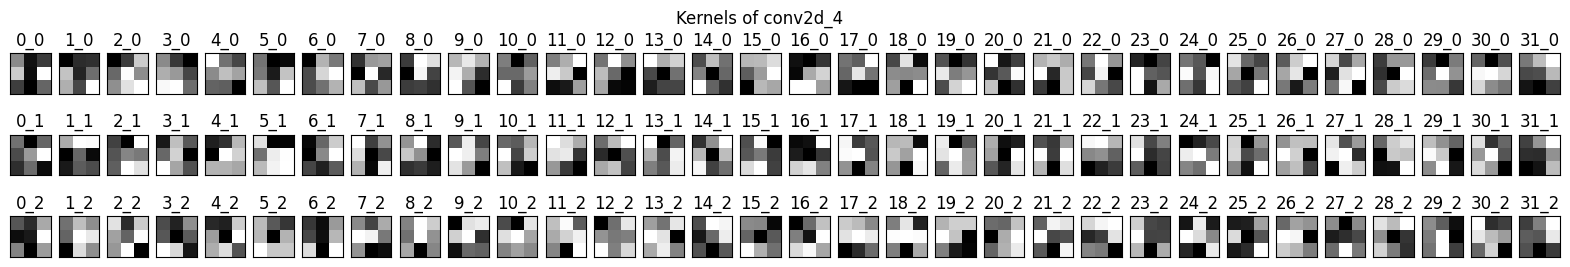

conv2d_11 (None, 30, 30, 32)
conv2d_12 (None, 28, 28, 32)
conv2d_13 (None, 12, 12, 64)
conv2d_14 (None, 10, 10, 64)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11_input (InputLayer  [(None, 32, 32, 3)]      0         
 )                                                               
                                                                 
 conv2d_11 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 2ms/step


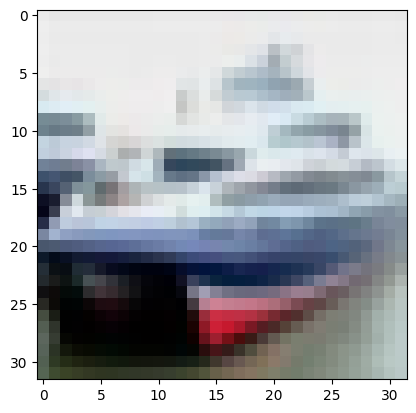

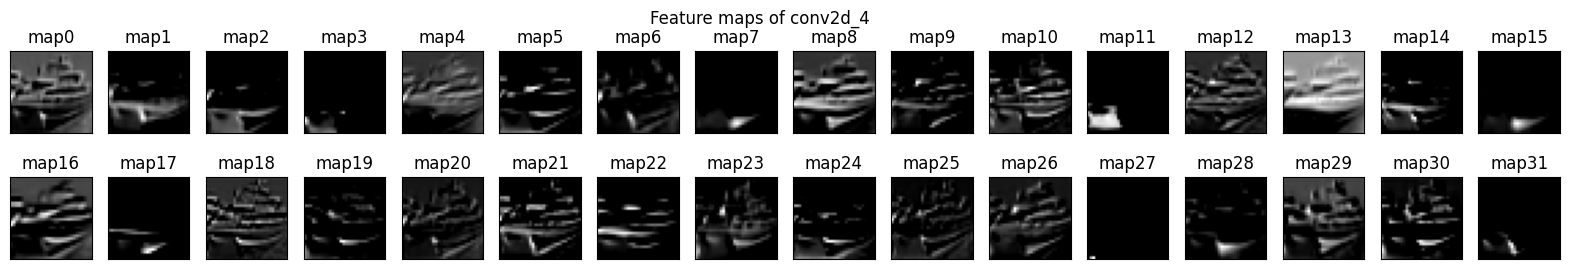

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.optimizers import Adam

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

cnn.summary() # cnn 모델의 정보 출력

for layer in cnn.layers: # 컨볼루션층의 커널을 시각화
    if 'conv' in layer.name:
        kernel,biases=layer.get_weights()
        print(layer.name,kernel.shape) # 커널의 텐서 모양을 출력

kernel,biases=cnn.layers[0].get_weights() # 층 0의 커널 정보를 저장
minv,maxv=kernel.min(),kernel.max()
kernel=(kernel-minv)/(maxv-minv)
n_kernel=32

import matplotlib.pyplot as plt

plt.figure(figsize=(20,3))
plt.suptitle("Kernels of conv2d_4")
for i in range(n_kernel): # i번째 커널
    f=kernel[:,:,:,i]
    for j in range(3): # j번째 채널
        plt.subplot(3,n_kernel,j*n_kernel+i+1)
        plt.imshow(f[:,:,j],cmap='gray')
        plt.xticks([]); plt.yticks([])
        plt.title(str(i)+'_'+str(j))
plt.show()

for layer in cnn.layers: # 컨볼루션층의 특징 맵을 시각화
    if 'conv' in layer.name:
        print(layer.name,layer.output.shape) # 특징 맵의 텐서 모양을 출력

from keras.models import Model

partial_model=Model(inputs=cnn.inputs,outputs=cnn.layers[0].output) # 층 0만 떼어냄
partial_model.summary()

feature_map=partial_model.predict(x_test) # 부분 모델로 테스트 집합을 예측
fm=feature_map[1] # 1번 영상의 특징 맵을 시각화

plt.imshow(x_test[1]) # 1번 영상을 출력

plt.figure(figsize=(20,3))
plt.suptitle("Feature maps of conv2d_4")
for i in range(32): # i번째 특징 맵
    plt.subplot(2,16,i+1)
    plt.imshow(fm[:,:,i],cmap='gray')
    plt.xticks([]); plt.yticks([])
    plt.title("map"+str(i))
plt.show()

# 6-7

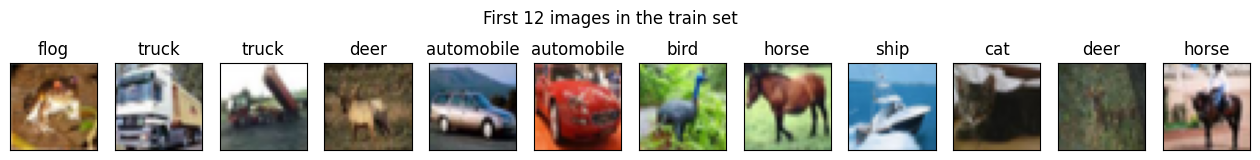

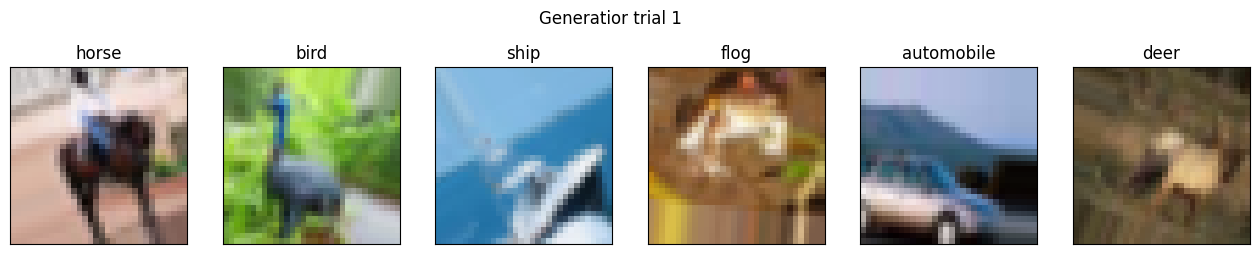

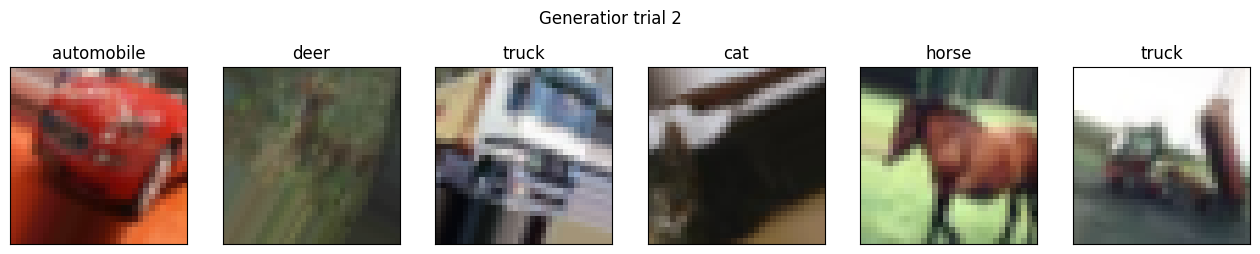

In [ ]:
from tensorflow import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# CIFAR-10의 부류 이름
class_names=['airplane','automobile','bird','cat','deer','dog','flog','horse','ship','truck']

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test)=cifar10.load_data()
x_train=x_train.astype('float32'); x_train/=255
x_train=x_train[0:12,]; y_train=y_train[0:12,] # 앞 12개에 대해서만 증대 적용

# 앞 12개 영상을 그려줌
plt.figure(figsize=(16,2))
plt.suptitle("First 12 images in the train set")
for i in range(12):
    plt.subplot(1,12,i+1)
    plt.imshow(x_train[i])
    plt.xticks([]); plt.yticks([])
    plt.title(class_names[int(y_train[i])])

# 영상 증대기 생성
batch_siz=6 # 한 번에 생성하는 양
generator=ImageDataGenerator(rotation_range=30.0,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True)
gen=generator.flow(x_train,y_train,batch_size=batch_siz)

# 첫 번째 증대하고 그리기
img,label=gen.next()
plt.figure(figsize=(16,3))
plt.suptitle("Generatior trial 1")
for i in range(batch_siz):
    plt.subplot(1,batch_siz,i+1)
    plt.imshow(img[i])
    plt.xticks([]); plt.yticks([])
    plt.title(class_names[int(label[i])])

# 두 번째 증대하고 그리기
img,label=gen.next()
plt.figure(figsize=(16,3))
plt.suptitle("Generatior trial 2")
for i in range(batch_siz):
    plt.subplot(1,batch_siz,i+1)
    plt.imshow(img[i])
    plt.xticks([]); plt.yticks([])
    plt.title(class_names[int(label[i])])

#6-8

Epoch 1/50


<ipython-input-44-c0f8aaeca3bb>:36: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist=cnn.fit_generator(generator.flow(x_train,y_train,batch_size=batch_siz),epochs=50,validation_data=(x_test,y_test),verbose=2)


391/391 - 56s - loss: 1.7174 - accuracy: 0.3625 - val_loss: 1.3414 - val_accuracy: 0.5100 - 56s/epoch - 142ms/step
Epoch 2/50
391/391 - 26s - loss: 1.3756 - accuracy: 0.5025 - val_loss: 1.2186 - val_accuracy: 0.5548 - 26s/epoch - 67ms/step
Epoch 3/50
391/391 - 27s - loss: 1.2464 - accuracy: 0.5538 - val_loss: 1.0488 - val_accuracy: 0.6245 - 27s/epoch - 68ms/step
Epoch 4/50
391/391 - 28s - loss: 1.1573 - accuracy: 0.5904 - val_loss: 0.9766 - val_accuracy: 0.6562 - 28s/epoch - 71ms/step
Epoch 5/50
391/391 - 27s - loss: 1.0807 - accuracy: 0.6189 - val_loss: 0.9190 - val_accuracy: 0.6750 - 27s/epoch - 69ms/step
Epoch 6/50
391/391 - 27s - loss: 1.0273 - accuracy: 0.6371 - val_loss: 0.9174 - val_accuracy: 0.6828 - 27s/epoch - 68ms/step
Epoch 7/50
391/391 - 27s - loss: 0.9853 - accuracy: 0.6508 - val_loss: 0.8343 - val_accuracy: 0.7044 - 27s/epoch - 70ms/step
Epoch 8/50
391/391 - 27s - loss: 0.9460 - accuracy: 0.6674 - val_loss: 0.7873 - val_accuracy: 0.7194 - 27s/epoch - 68ms/step
Epoch 9/50

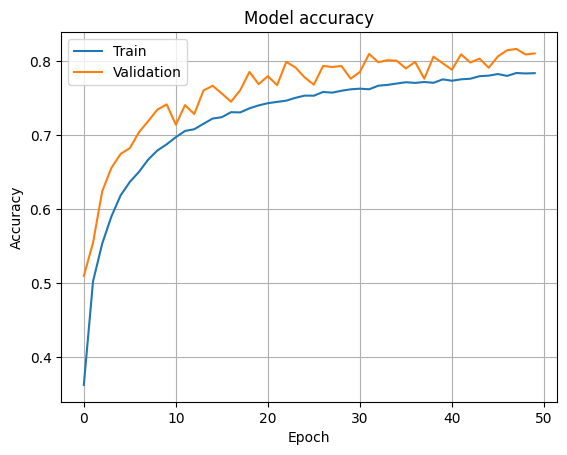

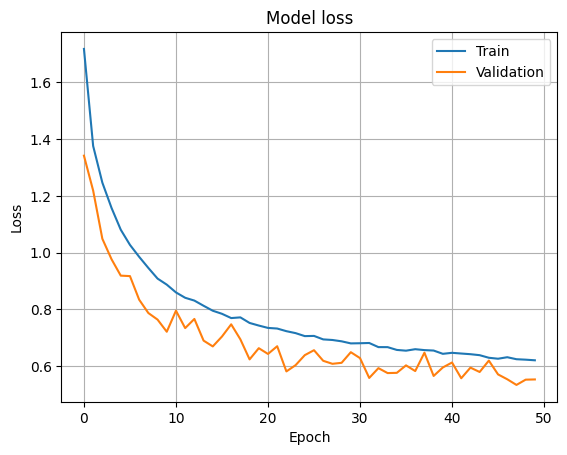

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습(영상 증대기 활용)
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
batch_siz=128
generator=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
hist=cnn.fit_generator(generator.flow(x_train,y_train,batch_size=batch_siz),epochs=50,validation_data=(x_test,y_test),verbose=2)

# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

#6-9

드롭아웃 적용 안 할 때: 0.7225400090217591
드롭아웃 적용할 때: 0.7500200033187866


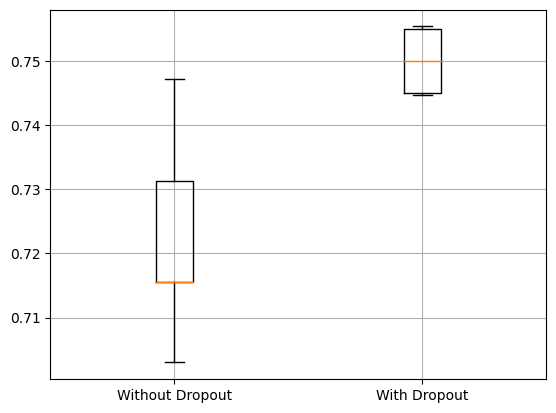

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 하이퍼 매개변수 설정
batch_siz=128
n_epoch=10
k=5 # k-겹 교차 검증

# 드롭아웃 비율에 따라 교차 검증을 수행하고 정확률을 반환하는 함수
def cross_validation(dropout_rate):
    accuracy=[]
    for train_index,val_index in KFold(k).split(x_train):
        # 훈련 집합과 검증 집합으로 분할
        xtrain,xval=x_train[train_index],x_train[val_index]
        ytrain,yval=y_train[train_index],y_train[val_index]

        # 신경망 모델 설계
        cnn=Sequential()
        cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
        cnn.add(Conv2D(32,(3,3),activation='relu'))
        cnn.add(MaxPooling2D(pool_size=(2,2)))
        cnn.add(Dropout(dropout_rate[0]))
        cnn.add(Conv2D(64,(3,3),activation='relu'))
        cnn.add(Conv2D(64,(3,3),activation='relu'))
        cnn.add(MaxPooling2D(pool_size=(2,2)))
        cnn.add(Dropout(dropout_rate[1]))
        cnn.add(Flatten())
        cnn.add(Dense(512,activation='relu'))
        cnn.add(Dropout(dropout_rate[2]))
        cnn.add(Dense(10,activation='softmax'))

        # 신경망 모델을 학습하고 평가하기
        cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
        cnn.fit(xtrain,ytrain,batch_size=batch_siz,epochs=n_epoch,verbose=0)
        accuracy.append(cnn.evaluate(xval,yval,verbose=0)[1])
    return accuracy

# 드롭아웃 비율을 달리하며 신경망을 평가
acc_without_dropout=cross_validation([0.0,0.0,0.0])
acc_with_dropout=cross_validation([0.25,0.25,0.5])

print("드롭아웃 적용 안 할 때:",np.array(acc_without_dropout).mean())
print("드롭아웃 적용할 때:",np.array(acc_with_dropout).mean())



# 박스 플롯으로 정확률 표시
plt.grid()
plt.boxplot([acc_without_dropout,acc_with_dropout],labels=["Without Dropout","With Dropout"])
plt.show()

#6-10

Epoch 1/10
313/313 - 4s - loss: 1.5991 - accuracy: 0.4184 - val_loss: 1.3164 - val_accuracy: 0.5212 - 4s/epoch - 13ms/step
Epoch 2/10
313/313 - 3s - loss: 1.2199 - accuracy: 0.5647 - val_loss: 1.1539 - val_accuracy: 0.5880 - 3s/epoch - 8ms/step
Epoch 3/10
313/313 - 3s - loss: 1.0301 - accuracy: 0.6381 - val_loss: 0.9900 - val_accuracy: 0.6510 - 3s/epoch - 8ms/step
Epoch 4/10
313/313 - 3s - loss: 0.8808 - accuracy: 0.6932 - val_loss: 0.9445 - val_accuracy: 0.6651 - 3s/epoch - 8ms/step
Epoch 5/10
313/313 - 3s - loss: 0.7732 - accuracy: 0.7308 - val_loss: 0.8947 - val_accuracy: 0.6934 - 3s/epoch - 9ms/step
Epoch 6/10
313/313 - 3s - loss: 0.6683 - accuracy: 0.7688 - val_loss: 0.8577 - val_accuracy: 0.7096 - 3s/epoch - 9ms/step
Epoch 7/10
313/313 - 3s - loss: 0.5657 - accuracy: 0.8047 - val_loss: 0.8570 - val_accuracy: 0.7174 - 3s/epoch - 8ms/step
Epoch 8/10
313/313 - 3s - loss: 0.4669 - accuracy: 0.8377 - val_loss: 0.9020 - val_accuracy: 0.7144 - 3s/epoch - 8ms/step
Epoch 9/10
313/313 - 3s

<ipython-input-2-649186d67bbf>:51: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn.fit_generator(generator.flow(x_train,y_train,batch_size=batch_siz),epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)


Epoch 1/10
391/391 - 28s - loss: 1.5984 - accuracy: 0.4110 - val_loss: 1.2676 - val_accuracy: 0.5444 - 28s/epoch - 72ms/step
Epoch 2/10
391/391 - 26s - loss: 1.2270 - accuracy: 0.5612 - val_loss: 1.0572 - val_accuracy: 0.6284 - 26s/epoch - 67ms/step
Epoch 3/10
391/391 - 26s - loss: 1.0646 - accuracy: 0.6224 - val_loss: 1.0053 - val_accuracy: 0.6494 - 26s/epoch - 67ms/step
Epoch 4/10
391/391 - 27s - loss: 0.9541 - accuracy: 0.6620 - val_loss: 0.9942 - val_accuracy: 0.6648 - 27s/epoch - 68ms/step
Epoch 5/10
391/391 - 26s - loss: 0.8801 - accuracy: 0.6895 - val_loss: 0.8470 - val_accuracy: 0.7020 - 26s/epoch - 67ms/step
Epoch 6/10
391/391 - 26s - loss: 0.8205 - accuracy: 0.7108 - val_loss: 0.7813 - val_accuracy: 0.7312 - 26s/epoch - 67ms/step
Epoch 7/10
391/391 - 26s - loss: 0.7749 - accuracy: 0.7281 - val_loss: 0.7250 - val_accuracy: 0.7437 - 26s/epoch - 65ms/step
Epoch 8/10
391/391 - 27s - loss: 0.7254 - accuracy: 0.7461 - val_loss: 0.6991 - val_accuracy: 0.7585 - 27s/epoch - 69ms/step


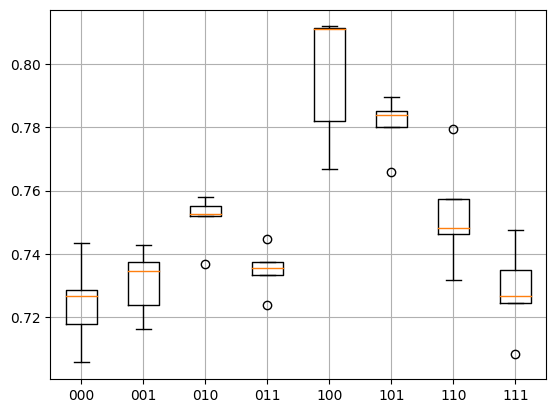

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold
from keras import regularizers
import matplotlib.pyplot as plt

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 하이퍼 매개변수 설정
batch_siz=128
n_epoch=10
k=5 # k-folds

# 하이퍼 매개변수에 따라 교차 검증을 수행하고 정확률을 반환하는 함수
def cross_validation(data_gen,dropout_rate,l2_reg):
    accuracy=[]
    for train_index,val_index in KFold(k).split(x_train):
        xtrain,xval=x_train[train_index],x_train[val_index]
        ytrain,yval=y_train[train_index],y_train[val_index]

        # 신경망 모델 설계
        cnn=Sequential()
        cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
        cnn.add(Conv2D(32,(3,3),activation='relu'))
        cnn.add(MaxPooling2D(pool_size=(2,2)))
        cnn.add(Dropout(dropout_rate[0]))
        cnn.add(Conv2D(64,(3,3),activation='relu'))
        cnn.add(Conv2D(64,(3,3),activation='relu'))
        cnn.add(MaxPooling2D(pool_size=(2,2)))
        cnn.add(Dropout(dropout_rate[1]))
        cnn.add(Flatten())
        cnn.add(Dense(512,activation='relu'))
        cnn.add(Dropout(dropout_rate[2]))
        cnn.add(Dense(10,activation='softmax',kernel_regularizer=regularizers.l2(l2_reg)))

        # 신경망을 학습하고 정확률 평가
        cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
        if data_gen:
            generator=ImageDataGenerator(rotation_range=3.0,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
            cnn.fit_generator(generator.flow(x_train,y_train,batch_size=batch_siz),epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)
        else:
            cnn.fit(xtrain,ytrain,batch_size=batch_siz,epochs=n_epoch, validation_data=(x_test,y_test),verbose=2)
        accuracy.append(cnn.evaluate(xval,yval,verbose=0)[1])
    return accuracy

# 하이퍼 매개변수를 달리 하며 신경망 모델을 평가
acc_000=cross_validation(False,[0.0,0.0,0.0],0.0)
acc_001=cross_validation(False,[0.0,0.0,0.0],0.01)
acc_010=cross_validation(False,[0.25,0.25,0.5],0.0)
acc_011=cross_validation(False,[0.25,0.25,0.5],0.01)
acc_100=cross_validation(True,[0.0,0.0,0.0],0.0)
acc_101=cross_validation(True,[0.0,0.0,0.0],0.01)
acc_110=cross_validation(True,[0.25,0.25,0.5],0.0)
acc_111=cross_validation(True,[0.25,0.25,0.5],0.01)

print("출력 형식: [Data augmentation-Dropout-l2 regularizer] (교차검증 시도/평균)")
print("[000] (",acc_000,"/",np.array(acc_000).mean(),")")
print("[001] (",acc_001,"/",np.array(acc_001).mean(),")")
print("[010] (",acc_010,"/",np.array(acc_010).mean(),")")
print("[011] (",acc_011,"/",np.array(acc_011).mean(),")")
print("[100] (",acc_100,"/",np.array(acc_100).mean(),")")
print("[101] (",acc_101,"/",np.array(acc_101).mean(),")")
print("[110] (",acc_110,"/",np.array(acc_110).mean(),")")
print("[111] (",acc_111,"/",np.array(acc_111).mean(),")")



# 박스 플롯으로 정확률 표시
plt.grid()
plt.boxplot([acc_000,acc_001,acc_010,acc_011,acc_100,acc_101,acc_110,acc_111],labels=["000","001","010","011","100","101","110","111"])
plt.show()

#6-11

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten,Dense
from keras.optimizers import Adam
from keras.applications import ResNet50
from keras.applications.densenet import preprocess_input
import os
#from keras.applications.resnet50 import preprocess_input
import keras.utils as image

os.chdir('/content/drive/MyDrive/Colab Notebooks/AI/Ch06')
train_folder='CUB200'
test_folder='CUB200'

class_reduce=0.1 # 부류 수 줄여서 데이터양 줄임(속도와 메모리 효율을 위해)
no_class=int(len(os.listdir(train_folder))*class_reduce) # 부류 개수

x_train,y_train=[],[]
for i,class_name in enumerate(os.listdir(train_folder)):
    if i<no_class: # 13~14행이 지정한 부류만 사용
        for fname in os.listdir(train_folder+'/'+class_name):
            img=image.load_img(train_folder+'/'+class_name+'/'+fname,target_size=(224,224))
            if len(img.getbands())!=3:
                print("주의: 유효하지 않은 영상 발생",class_name,fname)
                continue
            x=image.img_to_array(img)
            x=preprocess_input(x)
            x_train.append(x)
            y_train.append(i)

x_test,y_test=[],[]
for i,class_name in enumerate(os.listdir(test_folder)):
    if i<no_class: # 13~14행이 지정한 부류만 사용
        for fname in os.listdir(test_folder+'/'+class_name):
            img=image.load_img(test_folder+'/'+class_name+'/'+fname,target_size=(224,224))
            if len(img.getbands())!=3:
                print("주의: 유효하지 않은 영상 발생",class_name,fname)
                continue
            x=image.img_to_array(img)
            x=preprocess_input(x)
            x_test.append(x)
            y_test.append(i)

x_train=np.asarray(x_train)
y_train=np.asarray(y_train)
x_test=np.asarray(x_test)
y_test=np.asarray(y_test)
y_train=tf.keras.utils.to_categorical(y_train,no_class)
y_test=tf.keras.utils.to_categorical(y_test,no_class)
print(x_train)
print(y_train)
print(x_test)
print(y_test)


base_model=ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
cnn=Sequential()
cnn.add(base_model)
cnn.add(Flatten())
cnn.add(Dense(1024,activation='relu'))
cnn.add(Dense(no_class,activation='softmax'))

cnn.compile(loss='categorical_crossentropy',optimizer=Adam(0.00002),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=16,epochs=10,validation_data=(x_test,y_test),verbose=1)

res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

[[[[-2.117904  -2.0357141 -1.8044444]
   [-2.117904  -2.0357141 -1.8044444]
   [-2.117904  -2.0357141 -1.8044444]
   ...
   [-2.117904  -2.0357141 -1.8044444]
   [-2.117904  -2.0357141 -1.8044444]
   [-2.117904  -2.0357141 -1.8044444]]

  [[-2.117904  -2.0357141 -1.8044444]
   [-2.117904  -2.0357141 -1.8044444]
   [-2.117904  -2.0357141 -1.8044444]
   ...
   [-2.117904  -2.0357141 -1.8044444]
   [-2.117904  -2.0357141 -1.8044444]
   [-2.117904  -2.0357141 -1.8044444]]

  [[-2.117904  -2.0357141 -1.8044444]
   [-2.117904  -2.0357141 -1.8044444]
   [-2.117904  -2.0357141 -1.8044444]
   ...
   [-2.117904  -2.0357141 -1.8044444]
   [-2.117904  -2.0357141 -1.8044444]
   [-2.117904  -2.0357141 -1.8044444]]

  ...

  [[-2.117904  -2.0357141 -1.8044444]
   [-2.117904  -2.0357141 -1.8044444]
   [-2.117904  -2.0357141 -1.8044444]
   ...
   [-2.117904  -2.0357141 -1.8044444]
   [-2.117904  -2.0357141 -1.8044444]
   [-2.117904  -2.0357141 -1.8044444]]

  [[-2.117904  -2.0357141 -1.8044444]
   [-2.